In [48]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
from astropy.coordinates import Galactic, CartesianRepresentation
from astropy import units as u
from astropy.coordinates import CartesianRepresentation
from astropy.table import Table

In [50]:
sample_primordial = pd.read_csv('all_planets.csv')

sample_primordial.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_plxerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,5756.000000,5756.000000,5756.000000,5756.000000,5.480000e+03,4.979000e+03,4.979000e+03,5480.000000,5475.000000,2863.000000,...,5422.000000,5517.000000,5509.000000,5503.000000,5526.000000,5490.000000,5478.000000,5469.000000,5467.000000,5467.000000
mean,1.104065,1.766157,2016.415566,0.005212,7.805236e+04,9.612077e+04,-2.195251e+04,-0.000730,16.039629,2.356508,...,-0.052833,12.605862,0.100670,-0.102275,10.463569,0.042592,-0.042613,12.319828,0.000642,-0.000642
std,0.344414,1.150624,4.651429,0.072012,5.432986e+06,6.661132e+06,1.419306e+06,0.038205,359.828197,97.483155,...,0.260714,3.088077,0.138744,0.207147,3.022716,0.261055,0.267160,2.985630,0.001822,0.001822
min,1.000000,1.000000,1992.000000,0.000000,9.070629e-02,0.000000e+00,-1.000000e+08,-1.000000,0.004400,0.000000,...,-16.000000,0.872000,0.001000,-11.920000,-3.044000,0.011000,-9.995000,2.364310,0.000118,-0.063232
25%,1.000000,1.000000,2014.000000,0.000000,4.417637e+00,1.400000e-05,-1.572000e-03,0.000000,0.052900,0.000860,...,-0.045338,10.769000,0.030000,-0.126000,8.449000,0.020000,-0.031000,10.454000,0.000257,-0.000538
50%,1.000000,1.000000,2016.000000,0.000000,1.139097e+01,9.392000e-05,-9.543000e-05,0.000000,0.102900,0.002700,...,-0.030159,13.403000,0.080000,-0.080000,11.311500,0.023000,-0.023000,13.148000,0.000364,-0.000364
75%,1.000000,2.000000,2020.000000,0.000000,4.043137e+01,1.552000e-03,-1.400000e-05,0.000000,0.300400,0.034000,...,-0.022198,14.986000,0.126000,-0.030000,12.814000,0.031000,-0.020000,14.755500,0.000538,-0.000257
max,4.000000,8.000000,2024.000000,1.000000,4.020000e+08,4.700000e+08,0.000000e+00,1.000000,19000.000000,5205.000000,...,-0.011737,44.610000,3.100000,-0.001000,33.110000,9.995000,-0.011000,20.186100,0.063232,-0.000118


In [129]:
plot6 = sample_primordial[sample_primordial['sy_plx'] != 0]
plot6 = plot6[plot6['sy_plxerr1'] != 0]
plot6 = plot6[plot6['sy_plxerr2'] != 0]


plot6 = plot6.dropna(subset=['sy_plx', 'sy_plxerr1', 'sy_plxerr2'])


In [130]:
plot6 = plot6[plot6['disc_year'] <= 2019 ]


In [142]:
#loc  = Table.read('all_planets.csv', format='csv')
loc  = Table.from_pandas(plot6)

loc['dist_est'] = 1/loc['sy_plx']

In [137]:
d = loc['dist_est']
l = loc['glon']
b = loc['glat']

In [138]:
x =  8 - d * np.cos(b)*np.cos(l)
y = d * np.cos(b)*np.sin(l)
z = d * np.sin(b)

(10.0, -10.0)

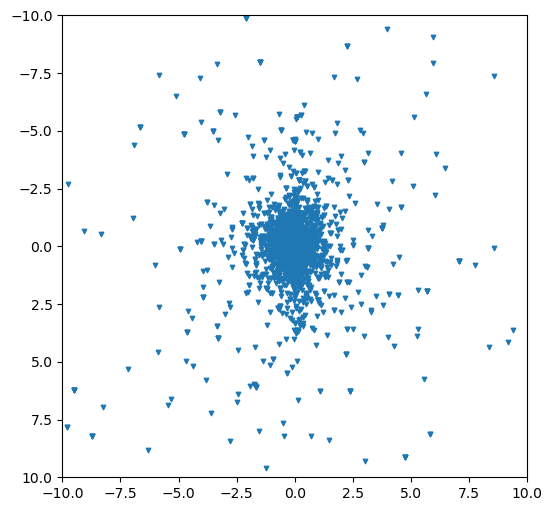

In [141]:
plt.figure(figsize=(6,6))
plt.scatter(y,z, s = 10, marker = 'v')
plt.xlim(-10,10)
plt.ylim(10,-10)